<a href="https://colab.research.google.com/github/demelere/CNNs-for-Computer-Vision/blob/master/458_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Model | Loss | Accuracy | Val Loss | Val Accuracy | Training | Testing
--- | --- | --- | --- | --- | --- | --- 
DNN (2 layers no dropout) | Row 1, Col 2 | 
DNN (3 layers no dropout) | Row 2, Col 2 |
CNN (2 layers no dropout) | Row 2, Col 2 |
CNN (2 layers no dropout) | Row 2, Col 2 |

Model | Loss | Accuracy | Val Loss | Val Accuracy | Training | Testing
--- | --- | --- | --- | --- | --- | --- 
DNN (2 layers w/dropout) | Row 1, Col 2 | 
DNN (3 layers w/dropout) | Row 2, Col 2 |
CNN (2 layers w/dropout) | Row 2, Col 2 |
CNN (2 layers w/dropout) | Row 2, Col 2 |

Parameters for all models: 
* Batch size = 100
* Epochs = 20
* Loss function = sparse categorical cross-entropy
* Optimizer = Adam

# A. Setup and Import

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import os
from collections import Counter
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# check Keras version
keras.__version__

# check tensorflow version
tf.__version__

# set seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
# Saving in Colab
# os.getcwd()
# %cd /content/gdrive/My\ Drive/MSDS458/weekfive
# !pwd
# !ls
# print('Working Directory')
# print(os.getcwd())
# work_dir = "content/gdrive/My Drive/MSDS458/weekfive"
# chp_id = "ann"

## A.1 Import data

In [6]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [7]:
# training labels are integers btw/0 and 9, and correspond to different articles of clothing
Counter(train_labels).most_common()

[(9, 6000),
 (0, 6000),
 (3, 6000),
 (2, 6000),
 (7, 6000),
 (5, 6000),
 (1, 6000),
 (6, 6000),
 (4, 6000),
 (8, 6000)]

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

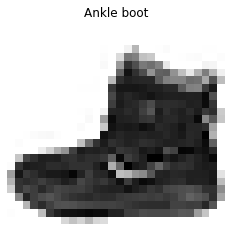

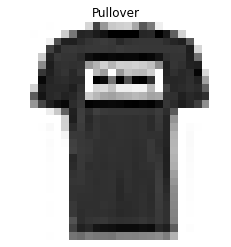

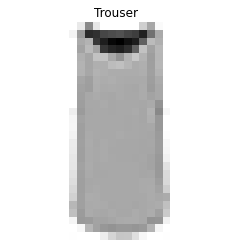

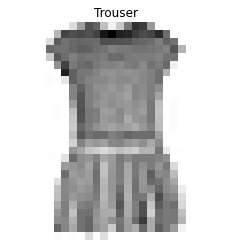

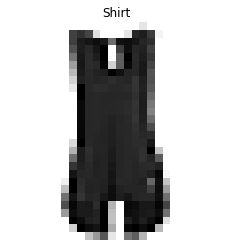

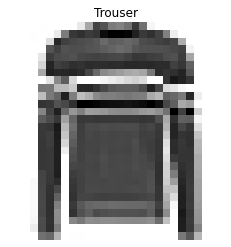

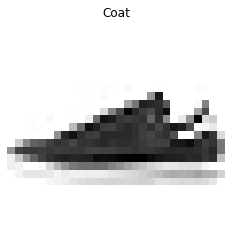

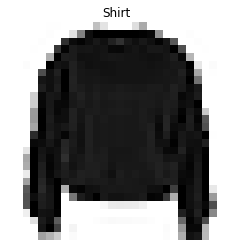

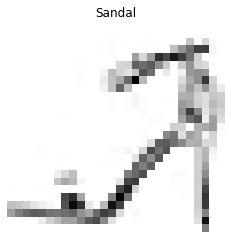

In [12]:
for i in range (9):
  plt.imshow(train_images[i], cmap="binary") 
  plt.axis('off')
  plt.title(class_names[test_labels[i]], fontsize=12)
  plt.show()

## A.2 Data Cleaning and Transformation

In [13]:
# Reshape the data into the right format for model (float32 array w/shape 60000, 28*28 and values btw/ 0 and 1).
#train_images = train_images.reshape((60000, 28 * 28))  # Decided instead to use a Flatten layer in the model
train_images = train_images.astype('float32') / 255

#test_images = test_images.reshape((10000, 28 * 28))  # Decided instead to use a Flatten layer in the model
test_images = test_images.astype('float32') / 255

In [14]:
# Hold back 5,000 of the 60,000 training images for validation.
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [15]:
# function to help calculate training and test evaluation times
class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [16]:
class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

# 1. Experiment 1: Baseline DNN w/2 layers

This model will have 784 input nodes.  It will take two dense (fully-connected) layers.  The first (hidden) layer will have 5 nodes, and the second (softmax) layer will have 10 output nodes.

In [17]:
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=[28, 28]))
model_1.add(layers.Dense(5, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax')) 

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


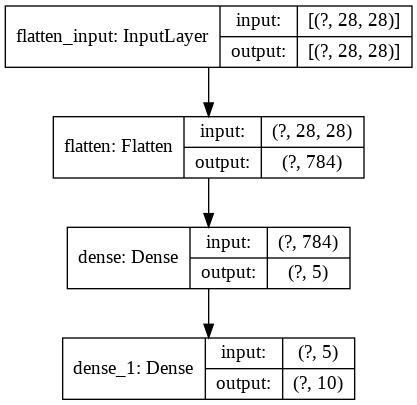

In [19]:
keras.utils.plot_model(model_1, show_shapes=True)

## 1A. Model Compilation

This step includes an optimizer (how the network updates itself based on the data and the loss function), a loss function (how the network measures how good a job it is doing on the data and adjusts), and metrics (accuracy).

In [20]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 1B. Model Training

Train model for 20 epochs with batch size 100

In [21]:
train_rt = TrainRuntimeCallback()
history = model_1.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 3ms/step - loss: 1.5333 - accuracy: 0.5120 - val_loss: 1.0563 - val_accuracy: 0.7034
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.8434 - accuracy: 0.7454 - val_loss: 0.6535 - val_accuracy: 0.7846
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.6183 - accuracy: 0.7958 - val_loss: 0.5835 - val_accuracy: 0.8096
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5639 - accuracy: 0.8114 - val_loss: 0.5502 - val_accuracy: 0.8138
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.8178 - val_loss: 0.5279 - val_accuracy: 0.8230
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8205 - val_loss: 0.5145 - val_accuracy: 0.8288
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5135 - accuracy: 0.8244 - val_loss: 0.5108 - val_accuracy: 0.8294
Epoch 

In [22]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

26.291443

In [23]:
model_1.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 5) dtype=float32, numpy=
 array([[-0.08495625, -0.02450575,  0.5867726 , -0.18403265, -0.30403847],
        [-0.13381931,  0.01560646,  0.09165865, -0.07803686,  0.00608766],
        [ 0.39040858, -0.4066511 , -0.4757636 , -0.48878846, -0.10543991],
        ...,
        [ 0.4744351 ,  0.41354445,  0.10598992, -0.03145837,  0.23590438],
        [ 0.00998982,  0.60049945, -0.11730633, -0.19239654,  0.39222446],
        [ 0.07808983,  0.431397  ,  0.2116207 , -0.48969564,  0.10832103]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 1.0045774 ,  0.8961467 ,  0.67530763,  0.9230627 , -0.32683724],
       dtype=float32)>]

## 1C. Model Testing

Test the model on the test dataset.

In [24]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.8244


In [25]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.634644

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
history_df=pd.DataFrame(history_dict)
# history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.472350,0.834200,0.484858,0.8346
16,0.469477,0.835364,0.490041,0.8330
17,0.467037,0.837309,0.485983,0.8356
18,0.466209,0.837127,0.487460,0.8384
19,0.463785,0.837818,0.485111,0.8342


In [28]:
# Create a results DataFrame using the last row of history_df
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','DNN (2 layers)') # went the model name to appear first
results_df['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,26.291443,0.634644


In [ ]:
# # Add the new data to results_df
# results_df=results_df.append(results_df2,ignore_index=True)
# results_df

## 1D. Performance

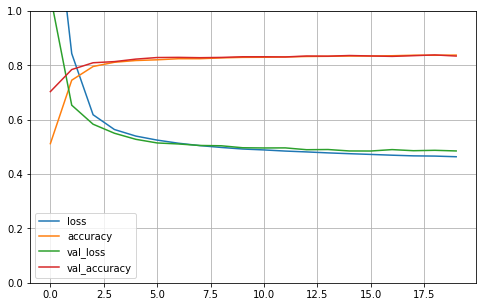

In [29]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 2. Experiment 2: DNN w/3 layers

This model will have 784 input nodes.  It will take three dense (fully-connected) layers.  The first (hidden) layer will have 10 nodes, a second hidden layer with 10 nodes, and a third (softmax) layer will have 10 output nodes.

In [30]:
# Instead of adding the layers one by one, we can pass a list of layers when creating the Sequential mode.
model_2 = models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


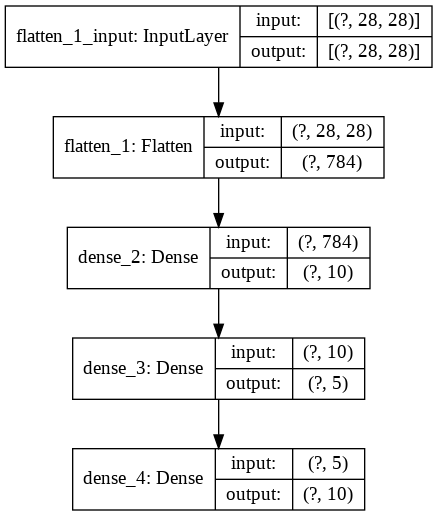

In [32]:
keras.utils.plot_model(model_2, show_shapes=True)

## 2A. Model Compilation

In [33]:
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 2B. Model Training


In [34]:
train_rt = TrainRuntimeCallback()
history = model_2.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.0934 - accuracy: 0.6273 - val_loss: 0.6276 - val_accuracy: 0.7880
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5943 - accuracy: 0.7963 - val_loss: 0.5267 - val_accuracy: 0.8194
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8206 - val_loss: 0.5050 - val_accuracy: 0.8320
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.8315 - val_loss: 0.4757 - val_accuracy: 0.8402
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.8371 - val_loss: 0.4547 - val_accuracy: 0.8458
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8415 - val_loss: 0.4435 - val_accuracy: 0.8494
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.8459 - val_loss: 0.4326 - val_accuracy: 0.8546
Epoch 

In [35]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

25.534299

In [36]:
model_2.layers[1].weights

[<tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.4925621 ,  0.04878267, -0.47940648, ...,  0.28546274,
         -0.38828492, -0.02152865],
        [ 0.5183464 ,  0.25312173,  0.5069263 , ..., -0.2122109 ,
         -0.65054905,  0.34231693],
        [ 0.18238327, -0.1502212 , -0.2130859 , ...,  0.27302274,
         -0.69527584, -0.1994194 ],
        ...,
        [-0.23606896, -0.13785227,  0.06954484, ..., -0.06773212,
          0.23245028,  0.42269328],
        [ 0.42236978, -0.762525  , -0.14763372, ...,  0.2259654 ,
          0.25379887,  0.16036195],
        [ 0.21001172, -0.11549312, -0.16125627, ...,  0.2857493 ,
         -0.25067648, -0.07645933]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.3373559 ,  0.40660846, -0.00816518,  0.27010486, -0.31941098,
         0.47647446, -0.01031993, -0.13826925, -0.25403666,  0.6022843 ],
       dtype=float32)>]

## 2C. Model Compilation

In [37]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8490


In [38]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.760157

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.394387,0.863873,0.421012,0.8582
16,0.391197,0.863582,0.402562,0.8682
17,0.388530,0.865491,0.400487,0.8686
18,0.387732,0.865745,0.407128,0.8646
19,0.385630,0.865982,0.401313,0.8648


In [41]:
history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df2 = history_df.iloc[-1:].copy()
results_df2.insert(0,'model','DNN (3 layers)') # went the model name to appear first
results_df2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers),0.38563,0.865982,0.401313,0.8648,25.534299,0.760157


In [42]:
# # Add the new data to results_df
# results_df=results_df.append(results_df2,ignore_index=True)
# results_df

## 2D. Performance

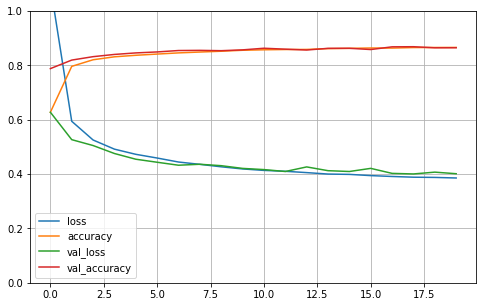

In [43]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 3. Experiment 3: CNN w/2 layers

This model will have 2 layers, each consisting of a convolution layer and a max pooling layer.  The second layer will return an array of 10 probability scores.

In [44]:
# Data re-import and preparation
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [45]:
# Reshape images and scale
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [46]:
# Validation images
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [47]:
model_3a = models.Sequential()
model_3a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Flatten())
model_3a.add(layers.Dense(128, activation='relu'))
model_3a.add(layers.Dense(10, activation='softmax'))

In [48]:
model_3a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

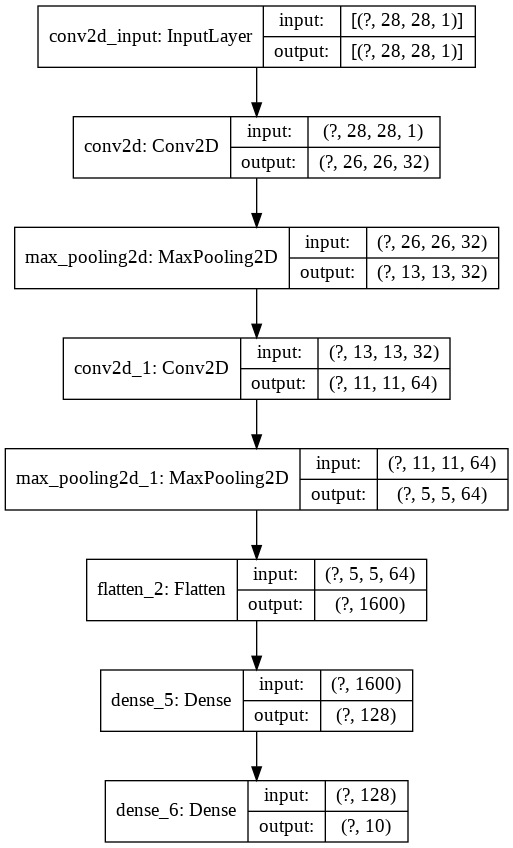

In [49]:
keras.utils.plot_model(model_3a, show_shapes=True)

## 3A. Model Compilation

In [50]:
model_3a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 3B. Model Training

In [51]:
train_rt = TrainRuntimeCallback()
history = model_3a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_3a.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.5366 - accuracy: 0.8075 - val_loss: 0.3788 - val_accuracy: 0.8640
Epoch 2/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3483 - accuracy: 0.8751 - val_loss: 0.3169 - val_accuracy: 0.8868
Epoch 3/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3028 - accuracy: 0.8899 - val_loss: 0.2966 - val_accuracy: 0.8928
Epoch 4/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2683 - accuracy: 0.9018 - val_loss: 0.2772 - val_accuracy: 0.9002
Epoch 5/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2456 - accuracy: 0.9111 - val_loss: 0.2548 - val_accuracy: 0.9092
Epoch 6/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2265 - accuracy: 0.9175 - val_loss: 0.2474 - val_accuracy: 0.9070
Epoch 7/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2074 - accuracy: 0.9231 - val_loss: 0.2339 - val_accuracy: 0.9148
Epoch 

In [52]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

42.654665

## 3C. Model Testing

Evaluate the model on the test dataset using a callback to get the total test time.

In [53]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3a.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.9128


In [54]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.856157

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.094811,0.965255,0.280224,0.9144
16,0.085593,0.968491,0.272949,0.9172
17,0.075359,0.972527,0.292871,0.9162
18,0.071219,0.974182,0.324832,0.9118
19,0.061248,0.978055,0.302873,0.9180


In [57]:
# Pull statistics 
results_df3a = history_df.iloc[-1:].copy()
results_df3a.insert(0,'model','CNN (2 layers)') # want the model name to appear first
results_df3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers),0.061248,0.978055,0.302873,0.918,42.654665,0.856157


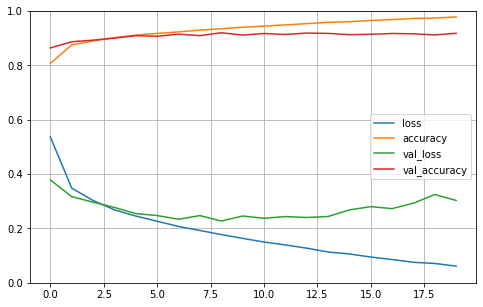

In [58]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 4. Experiment 4: CNN w/3 layers
We create a `CNN` with 3 convolution/max pooling layers (**no drop out**) to work with our Fashion MNIST dataset. The experiment compares performance using L2 regularization in the convolutional layers. Image augmentation is not employed.

## Model 4a: baseline CNN with 3 layers (no L2 regularization)

In [59]:
model_4a = models.Sequential()
model_4a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.Flatten())
model_4a.add(layers.Dense(64, activation='relu'))
model_4a.add(layers.Dense(10, activation='softmax'))

In [60]:
model_4a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

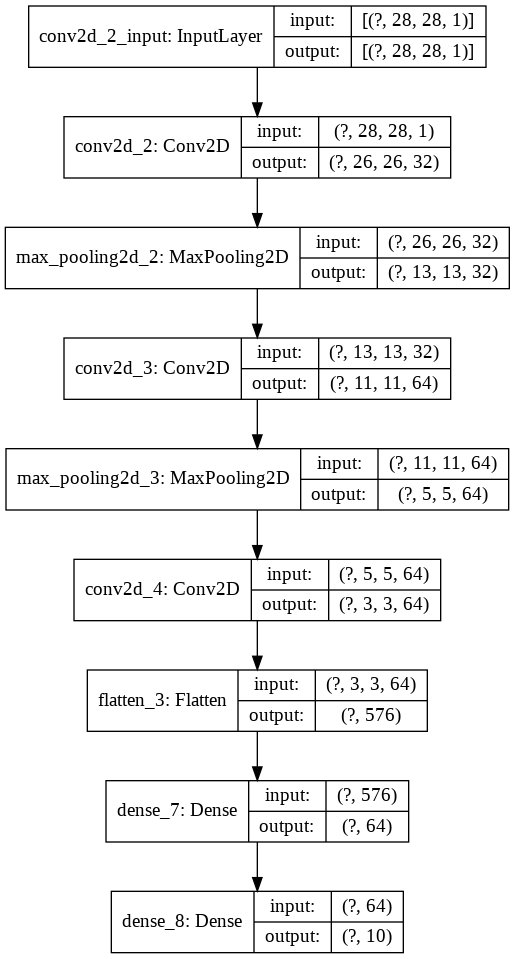

In [61]:
keras.utils.plot_model(model_4a, show_shapes=True)

## 4A. Model Compilation

In [62]:
model_4a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 4B. Model Compilation

In [63]:
train_rt = TrainRuntimeCallback()
history = model_4a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4a.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.5839 - accuracy: 0.7873 - val_loss: 0.3805 - val_accuracy: 0.8660
Epoch 2/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8678 - val_loss: 0.3182 - val_accuracy: 0.8850
Epoch 3/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.8861 - val_loss: 0.3021 - val_accuracy: 0.8902
Epoch 4/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2804 - accuracy: 0.8971 - val_loss: 0.2674 - val_accuracy: 0.9024
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2559 - accuracy: 0.9056 - val_loss: 0.2584 - val_accuracy: 0.9048
Epoch 6/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2388 - accuracy: 0.9116 - val_loss: 0.2590 - val_accuracy: 0.9022
Epoch 7/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2180 - accuracy: 0.9193 - val_loss: 0.2410 - val_accuracy: 0.9092
Epoch 

In [64]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

39.695646

## 4C. Model Testing

In [65]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4a.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.9042


In [66]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.773794

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [68]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.110460,0.959455,0.280067,0.9180
16,0.102719,0.961855,0.283918,0.9166
17,0.092769,0.965309,0.298722,0.9166
18,0.086586,0.967655,0.302397,0.9158
19,0.076909,0.971745,0.316066,0.9076


In [69]:
# Pull statistics 
# Pull statistics 
results_df4a = history_df.iloc[-1:].copy()
results_df4a.insert(0,'model','CNN (3 layers)') # want the model name to appear first
results_df4a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df4a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers),0.076909,0.971745,0.316066,0.9076,39.695646,0.773794


In [70]:
# Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = results_df.append(results_df3a,ignore_index=True)
# results_df = results_df.append(results_df3b,ignore_index=True)
# results_df

## Plot the performance 

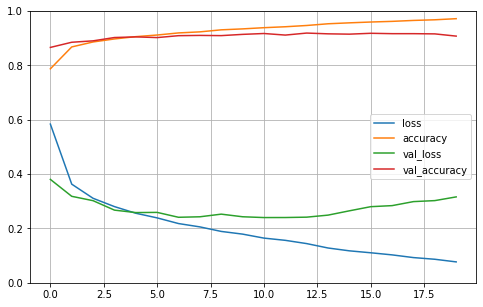

In [71]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 5. Experiment 5: Add Dropout to All Models

In [83]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [84]:
# We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))  
test_images = test_images.astype('float32') / 255

# Create validation data
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

## 5A. Model 1

In [85]:
model_1do = models.Sequential()
# model_1do.add(layers.Flatten(input_shape=[28, 28]))
model_1do.add(layers.Dense(5, activation='relu', input_shape=(28 * 28,)))
model_1do.add(layers.Dropout(0.2))
model_1do.add(layers.Dense(10, activation='softmax')) 

model_1do.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1do.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [86]:
train_rt = TrainRuntimeCallback()
history = model_1do.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100, validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1do.h5'
# model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.7644 - accuracy: 0.3171 - val_loss: 1.2345 - val_accuracy: 0.5548
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 1.3814 - accuracy: 0.4607 - val_loss: 1.0585 - val_accuracy: 0.6716
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 1.3077 - accuracy: 0.5046 - val_loss: 0.9868 - val_accuracy: 0.6942
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 1.2823 - accuracy: 0.5377 - val_loss: 0.9371 - val_accuracy: 0.7210
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 1.2600 - accuracy: 0.5518 - val_loss: 0.9063 - val_accuracy: 0.7284
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 1.2011 - accuracy: 0.5688 - val_loss: 0.8310 - val_accuracy: 0.7412
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1117 - accuracy: 0.6038 - val_loss: 0.7705 - val_accuracy: 0.7792
Epoch 

In [87]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

25.552512

In [88]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1do.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.7883


In [89]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.620148

In [90]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Create a results DataFrame using the last row of history_df
results_df_do = history_df.iloc[-1:].copy()
results_df_do.insert(0,'model','DNN (2 layers DO)') # went the model name to appear first
results_df_do['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers DO),0.993866,0.651673,0.688064,0.8024,25.552512,0.620148


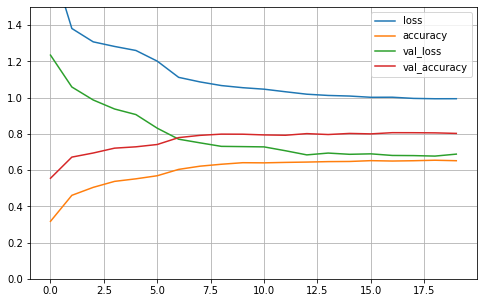

In [91]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

## 5B. Model 2

In [93]:
model_2do = models.Sequential()
# model_1do.add(layers.Flatten(input_shape=[28, 28]))
model_2do.add(layers.Dense(5, activation='relu', input_shape=(28 * 28,)))
model_2do.add(layers.Dropout(0.2))
model_2do.add(layers.Dense(10, activation='relu'))
model_2do.add(layers.Dropout(0.2))
model_2do.add(layers.Dense(10, activation='softmax')) 

model_2do.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2do.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                60        
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 4,095
Trainable params: 4,095
Non-trainable params: 0
_________________________________________________________________


In [94]:
train_rt = TrainRuntimeCallback()
history = model_2do.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2do.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.6983 - accuracy: 0.3448 - val_loss: 1.1385 - val_accuracy: 0.5690
Epoch 2/20
550/550 [==============================] - 1s 3ms/step - loss: 1.2925 - accuracy: 0.4784 - val_loss: 0.9177 - val_accuracy: 0.6734
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1813 - accuracy: 0.5259 - val_loss: 0.8708 - val_accuracy: 0.6952
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1518 - accuracy: 0.5434 - val_loss: 0.8244 - val_accuracy: 0.7352
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1262 - accuracy: 0.5668 - val_loss: 0.7991 - val_accuracy: 0.7432
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1074 - accuracy: 0.5802 - val_loss: 0.7934 - val_accuracy: 0.7576
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 1.0938 - accuracy: 0.5899 - val_loss: 0.7826 - val_accuracy: 0.7704
Epoch 

In [95]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

26.901322

In [96]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2do.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.7413 - accuracy: 0.7688


In [97]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.660825

In [119]:
history_dict = history.history
history_dict.keys()

istory_df=pd.DataFrame(history_dict)
history_df.tail()

history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df_do_2 = history_df.iloc[-1:].copy()
results_df_do_2.insert(0,'model','DNN (3 layers DO)') # went the model name to appear first
results_df_do_2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955


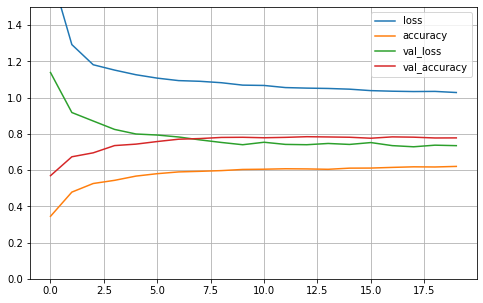

In [99]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

## 5C. Model 3

In [100]:
# We transform it into a float32 array of shape (60000, 28, 28, 1) with values between 0 and 1. 
train_images = train_images.reshape((55000, 28, 28, 1))
val_images =val_images.reshape((5000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [101]:
model_3ado = models.Sequential()
model_3ado.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3ado.add(layers.MaxPooling2D((2, 2)))
model_3ado.add(layers.Dropout(0.2))
model_3ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3ado.add(layers.MaxPooling2D((2, 2)))
model_3ado.add(layers.Dropout(0.2))
model_3ado.add(layers.Flatten())
model_3ado.add(layers.Dense(128, activation='relu'))
model_3ado.add(layers.Dense(10, activation='softmax'))

model_3ado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3ado.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)            

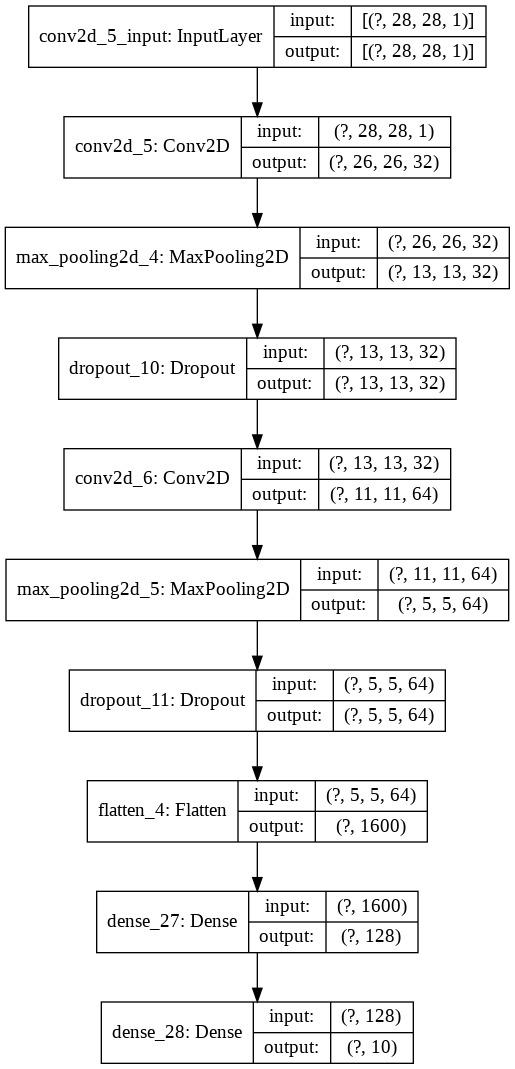

In [102]:
keras.utils.plot_model(model_3ado, show_shapes=True)

In [103]:
train_rt = TrainRuntimeCallback()
history = model_3ado.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_3ado.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.5702 - accuracy: 0.7911 - val_loss: 0.3723 - val_accuracy: 0.8706
Epoch 2/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3850 - accuracy: 0.8609 - val_loss: 0.3238 - val_accuracy: 0.8854
Epoch 3/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3352 - accuracy: 0.8784 - val_loss: 0.2936 - val_accuracy: 0.8944
Epoch 4/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3046 - accuracy: 0.8895 - val_loss: 0.2757 - val_accuracy: 0.9034
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2824 - accuracy: 0.8965 - val_loss: 0.2560 - val_accuracy: 0.9096
Epoch 6/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2660 - accuracy: 0.9018 - val_loss: 0.2452 - val_accuracy: 0.9104
Epoch 7/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2482 - accuracy: 0.9085 - val_loss: 0.2343 - val_accuracy: 0.9142
Epoch 

In [104]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

42.803475

In [105]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3ado.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 3ms/step - loss: 0.2398 - accuracy: 0.9138


In [106]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.929794

In [120]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Pull statistics 
results_df_do_3a = history_df.iloc[-1:].copy()
results_df_do_3a.insert(0,'model','CNN (2 layers DO)') # want the model name to appear first
results_df_do_3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955


In [ ]:
# # Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = prev_results_df.append(results_df,ignore_index=True)
# results_df

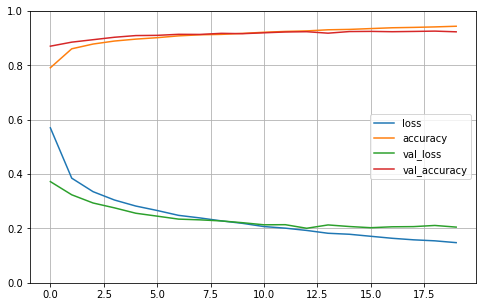

In [108]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 5D. Model 4

In [110]:
model_4ado = models.Sequential()
model_4ado.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4ado.add(layers.MaxPooling2D((2, 2)))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4ado.add(layers.MaxPooling2D((2, 2)))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Flatten())
model_4ado.add(layers.Dense(64, activation='relu'))
model_4ado.add(layers.Dense(10, activation='softmax'))

model_4ado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4ado.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)        

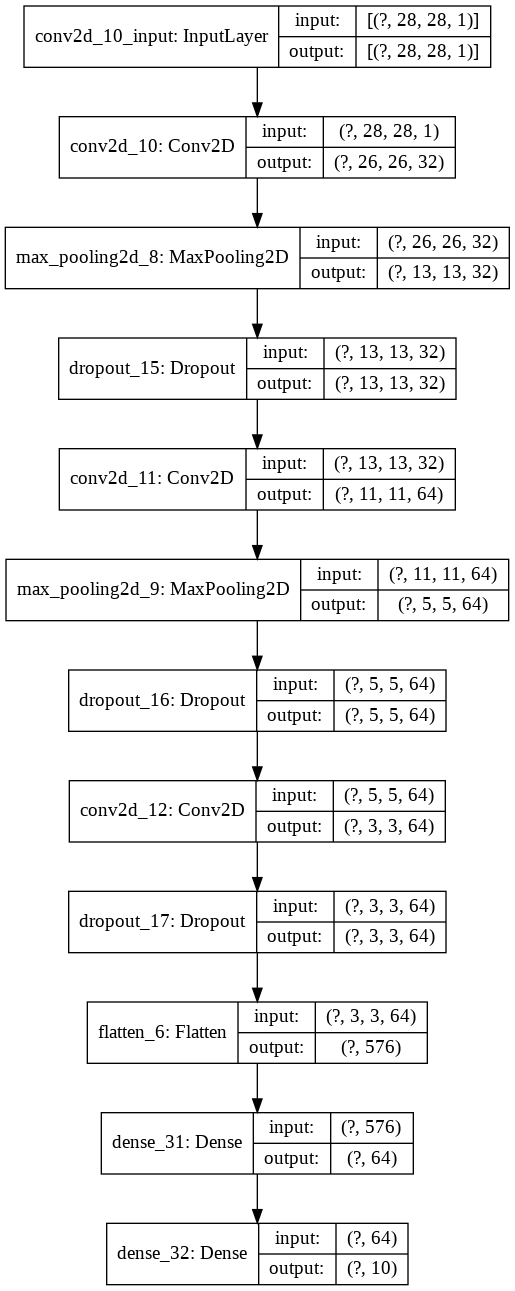

In [111]:
keras.utils.plot_model(model_4ado, show_shapes=True)

In [112]:
train_rt = TrainRuntimeCallback()
history = model_4ado.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4ado.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 5ms/step - loss: 0.6784 - accuracy: 0.7475 - val_loss: 0.4134 - val_accuracy: 0.8568
Epoch 2/20
550/550 [==============================] - 2s 4ms/step - loss: 0.4316 - accuracy: 0.8399 - val_loss: 0.3420 - val_accuracy: 0.8762
Epoch 3/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3765 - accuracy: 0.8620 - val_loss: 0.3260 - val_accuracy: 0.8806
Epoch 4/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3452 - accuracy: 0.8722 - val_loss: 0.2904 - val_accuracy: 0.8960
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3197 - accuracy: 0.8813 - val_loss: 0.2679 - val_accuracy: 0.9014
Epoch 6/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3009 - accuracy: 0.8888 - val_loss: 0.2638 - val_accuracy: 0.8992
Epoch 7/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2849 - accuracy: 0.8938 - val_loss: 0.2452 - val_accuracy: 0.9146
Epoch 

In [113]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

46.630616

In [114]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4ado.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.9093


In [115]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.879955

In [121]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Pull statistics 
# Pull statistics 
results_df_do_4a = history_df.iloc[-1:].copy()
results_df_do_4a.insert(0,'model','CNN (3 layers DO)') # want the model name to appear first
results_df_do_4a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_4a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955


In [117]:
# Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = results_df.append(results_df3a,ignore_index=True)
# results_df = results_df.append(results_df3b,ignore_index=True)
# results_df

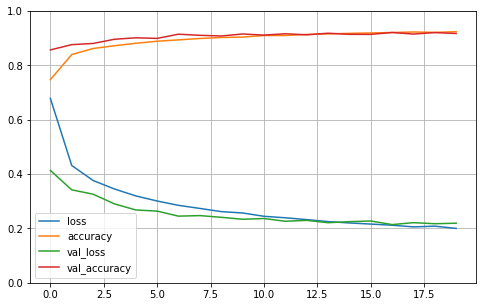

In [118]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 6. Final Results

In [130]:
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
0,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,26.291443,0.634644
1,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,26.291443,0.634644
2,DNN (3 layers DO),1.028041,0.620273,0.734786,0.7776,26.901322,0.660825
3,CNN (2 layers DO),0.147733,0.943891,0.204907,0.9234,42.803475,0.929794
4,CNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
...,...,...,...,...,...,...,...
87,CNN (2 layers DO),0.147733,0.943891,0.204907,0.9234,42.803475,0.929794
88,CNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
89,DNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
90,CNN (2 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955


In [129]:
# # # Add the new data to results_df:
# # results_df=results_df.append(results_df,ignore_index=True)
# # results_df=results_df.append(results_df2,ignore_index=True)
# # results_df=results_df.append(results_df3a,ignore_index=True)
# # results_df=results_df.append(results_df4a,ignore_index=True)
# # results_df=results_df.append(results_df_do,ignore_index=True)
# # results_df=results_df.append(results_df_do_2,ignore_index=True)
# # results_df=results_df.append(results_df_do_3a,ignore_index=True)
# # results_df=results_df.append(results_df_do_4a,ignore_index=True)

# results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
0,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,26.291443,0.634644
1,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,26.291443,0.634644
2,DNN (3 layers DO),1.028041,0.620273,0.734786,0.7776,26.901322,0.660825
3,CNN (2 layers DO),0.147733,0.943891,0.204907,0.9234,42.803475,0.929794
4,CNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
...,...,...,...,...,...,...,...
87,CNN (2 layers DO),0.147733,0.943891,0.204907,0.9234,42.803475,0.929794
88,CNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
89,DNN (3 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
90,CNN (2 layers DO),0.200088,0.923855,0.219272,0.9172,46.630616,0.879955
